<a href="https://colab.research.google.com/github/CKDabral/M-L-Exercise/blob/master/Chanderkant_Dabral_LPU_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

Train the model using gradient descent algorithm.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Generate data

In [0]:

def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    # YOUR CODE HERE
    y=np.sin(x)
    return y

In [0]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [0]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,2*pi)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    # YOUR CODE HERE
    x=(2*np.pi)*np.random.rand(N)
    yd=fx(x)
    
    return x, yd

In [0]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

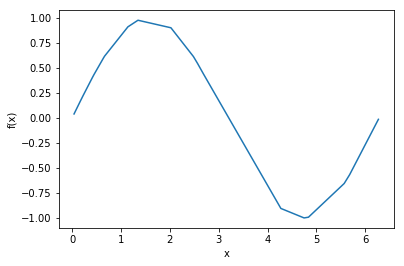

In [0]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')

plotdata()

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>



In [0]:
def createA(x, D):
    '''
    Create the vector A with degree D
    Input:
        x: a single scalar
        D: degree of the model
    Output:
        A: vector of length D+1
    '''
    # YOUR CODE HERE
    
    if type(x)==type(np.array(1)):
      l=x
      li=[]
      for i in range(D+1):
        k=[(x)**i for x in l]
        li.append(k)
      A=np.array(li,dtype=float)
      A=A.T
      return A
    else:
      A=np.ones((D+1,))
      for i in range(1,D+1):
        A[i]=x**i
    return A

### Initialize Weights

In [0]:
def init_w(D):
    '''
    Inputs:
        D: int; the degree of the model
    Output:
        w: np vector of shape (D+1,), initialized randomly to small values in (-1,1)
    '''
    # YOUR CODE HERE
    w=(2)*np.random.rand(D+1,)-1
    return w

In [0]:
'''Testing'''
def test_init_w():
    D = 2
    w = init_w(D)
    assert w.shape==(3,)
    assert np.all(w<=1)
    
    print('Test passed', '\U0001F44D')
test_init_w()

Test passed 👍


### Estimate y from the model, given x

In [0]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: a single scalar
    Outputs:
        yhat: a single scalar; y=Aw
    '''
    # YOUR CODE HERE
    D=w.shape[0]-1
    A=createA(x,D)
    yhat=A.dot(w)
    return yhat

In [0]:
'''Testing'''
def test_predict_y():
    w = np.array([1,2,3])
    x = 0.2
    y = predict_y(w, x)
    assert (np.isclose(y, 1.066, atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

AssertionError: ignored

## Training
We will now define a linear model to estimate the above function, and train it with all the data. Estimate w from yd and x. Use the grdient descent method you learnt in the video

### Estimate Error
Find E as the mean squared error

In [0]:
def compute_mse(y, yd):
    '''
    Inputs:
        yhat: a scalar; yhat=Aw
        yd: a scalar; yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    # YOUR CODE HERE
    mse=np.square(y-yd)/len(y)
    return mse

In [0]:

'''Testing'''
def test_compute_mse():
    yd = np.array([1])
    y = np.array([.8])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### Estimate gradients

In [0]:

def calc_dw(x, yhat, y, D):
    '''
    Inputs:
        x: scalar
        yhat: scalar; yhat = Aw
        y: scalar; y = f(x)
    Outputs:
        dw: np vector of shape (D+1,) 
    '''
    # YOUR CODE HERE
    if type(x)==type(np.array(1)):
      dw=np.zeros((D+1,))     #dw size is D+1 because w0+w1 x^1+w2 x^2.....+wD x^D  so,D+1 dw is required
      A=createA(x,D)          # it returns a vector having values of a sample havind D features hence createA(x,D) return (D+1,) vector 
      dw=(2*(yhat-y).dot(A))/A.shape[0]   # it is curly(E)/curly(w) for caclculating direction of downhill and this values are using in predicting new values
    else:      
      dw=np.zeros((D+1,))     #dw size is D+1 because w0+w1 x^1+w2 x^2.....+wD x^D  so,D+1 dw is required
      A=createA(x,D)          # it returns a vector having values of a sample havind D features hence createA(x,D) return (D+1,) vector 
      dw=(2*(yhat-y)*(A))/A.shape[0]   # it is curly(E)/curly(w) for caclculating direction of downhill and this values are using in predicting new values
    return dw

In [0]:
'''Testing'''
def test_calc_dw():
    
    assert calc_dw(1,2,2,2).shape[0] == 3
    print('Test passed', '\U0001F44D')

test_calc_dw()

Test passed 👍


In [0]:
def update_w(w, dw, eta):
    '''
    Input:
        w: np array of any shape
        dw: np array of same shape
        eta: scalar
    Output:
        w: updated np array of same shape 
    '''
    # YOUR CODE HERE
    w=w-eta*dw
    return w
    

In [0]:
'''Testing'''
def test_update_w():
    
    assert update_w(0,1,1) == -1
    print('Test passed', '\U0001F44D')

test_calc_dw()

Test passed 👍


In [0]:
def train_w(x, yd, w, Nepoch, eta):
    '''
    Inputs:
        x: np vector of shape (N,)
        yd: np vector of shape (N,); y = f(x)
        w: np vector of shape (D+1,)
        Nepoch: int, Number of epochs to be run
    Outputs:
        w: np vector of shape (D+1,) with weights being updated
    '''
    # YOUR CODE HERE
    y=fx(x)
    D=w.shape[0]-1
    A=createA(x,D)
    print(A.shape)
    yhat=A.dot(w)
    dw=calc_dw(x, yhat, y, D)
    for i in range(Nepoch):
      w=update_w(w, dw, eta)
    return w

### Plotting


In [0]:
def plotModel(x, y, yd, title='',xlim=[0,7]):
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])
    plt.xlim(xlim)
    plt.title(title)
    plt.show()


# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

(10, 3)


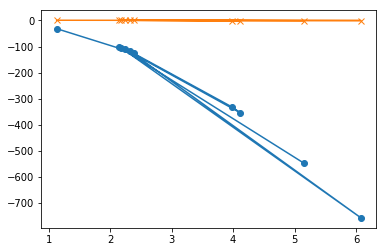

In [0]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    
    x=(2*np.pi)*np.random.rand(N)
    yd=np.sin(x)
    w=init_w(D)
    
    A=createA(x,D)
    
    y=A.dot(w)
    
    dw=calc_dw(x,y,yd,D)
    w=init_w(D)
    Nepoch=100
    eta=0.01
    w=train_w(x, yd, w, Nepoch, eta)
    y=A.dot(w)
    mse=(np.square(y-yd)/y.shape[0])
    return x, y, yd, w, mse
x,y,yd,w,mse=trainModel(10,2)
mse=sum(mse)/len(mse)
plt.plot(x,y,'-o')
plt.plot(x,yd,'-x')

## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [0]:


def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    x=2*np.pi*np.random.rand(Ntest)
    yd=np.sin(x)
    D=w.shape[0]-1
    A=createA(x,D)
    y=A.dot(w)
    mse=(np.square(y-yd)/y.shape[0])
    return x, y, yd, mse


# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

N=3; D=5
(3, 6)
MSE on train data =  [7.70302304e+20 2.06439375e+22 1.08658703e+11]


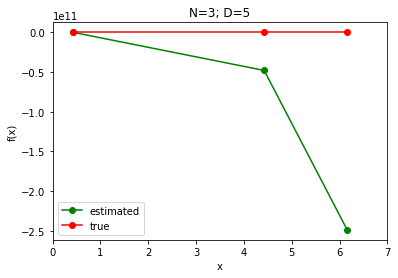

MSE on test data =N  [1.91828946e+20 1.97594655e+18 1.27431288e+16 8.22035556e+13
 1.32658157e+21 1.49969275e+10 9.01516810e+19 5.11826721e+20
 4.11705003e+20 1.78734905e+18 3.08933730e+15 7.03852177e+20
 9.03092290e+16 8.39175855e+13 3.09608961e+19 6.15340600e+19
 1.66427118e+11 2.85074224e+12 6.54551787e+14 4.79462199e+20
 2.99320848e+18 1.04508522e+19 1.28337044e+16 9.14644758e+16
 3.04129549e+18 4.68368560e+20 5.40899320e+19 9.95838745e+20
 2.87737666e+20 1.18217047e+20 1.08920190e+19 3.25874250e+15
 1.09863963e+13 1.16351860e+11 1.06515956e+17 1.02167788e+21
 1.24235743e+15 1.42327372e+21 6.57807859e+20 1.16952016e+10
 1.80421003e+20 1.13525334e+20 3.93952767e+19 6.42958816e+20
 7.34529537e+15 1.12808307e+21 2.09981184e+17 7.38832161e+15
 4.29125806e+16 3.74546190e+16]


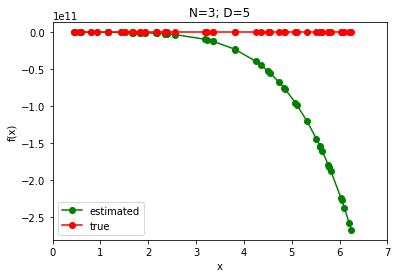

N=5; D=5
(5, 6)
MSE on train data =  [8.54111661e+18 1.66726201e+17 4.03830102e+16 4.53950452e+05
 4.86476031e+18]


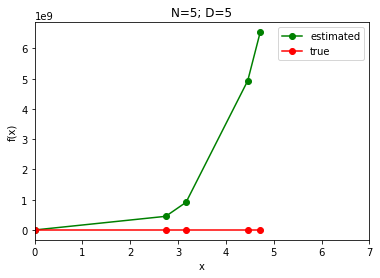

MSE on test data =N  [8.09121641e+17 3.78984215e+15 2.08808758e+17 4.60750249e+16
 1.78604317e+18 5.31584607e+13 1.11868595e+13 1.14896855e+11
 4.10501251e+17 6.75764525e+06 4.14353889e+16 8.76437406e+15
 1.05670323e+10 4.67455353e+14 1.06276516e+19 5.72880529e+17
 3.41447064e+15 7.42953510e+17 3.86005084e+16 2.07333950e+09
 3.50773052e+18 7.30088418e+18 7.01076181e+17 8.22271794e+16
 1.64279110e+09 9.93497432e+18 3.05914849e+17 1.73700883e+18
 7.28844268e+08 4.20589087e+15 1.94566238e+18 1.07981219e+12
 1.41791111e+14 9.20996242e+08 1.26377938e+10 5.76910313e+10
 2.93819559e+15 3.80102713e+18 9.76693449e+18 3.65808126e+17
 2.32982542e+16 1.98572193e+13 5.32475966e+18 2.70077810e+13
 4.25840374e+05 1.25540411e+18 1.77137718e+14 1.11835201e+19
 6.31673881e+18 4.00363787e+08]


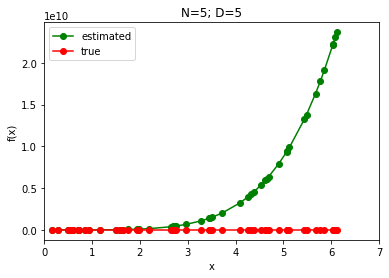

N=10; D=5
(10, 6)
MSE on train data =  [2.58732429e+20 5.51427608e+19 9.69098044e+17 3.57929021e+20
 1.59549255e+21 3.51178408e+21 6.29042827e+18 1.62765451e+18
 2.43101180e+18 2.35504733e+21]


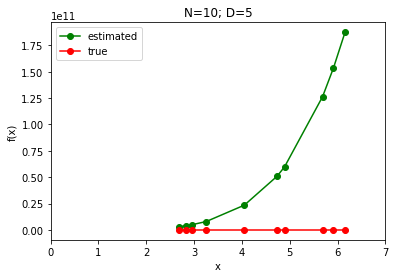

MSE on test data =N  [4.43660040e+20 2.15524360e+18 3.45714745e+12 4.06921364e+16
 8.12641868e+16 2.46605152e+08 3.81794412e+13 2.19263070e+20
 5.14051084e+12 7.66069982e+15 3.49327557e+18 1.19978563e+19
 5.73851213e+15 1.39220380e+15 5.66074175e+19 8.75120463e+17
 4.55139897e+20 8.71124937e+16 1.14123182e+19 2.37199035e+17
 1.75617853e+17 9.41636091e+19 4.73604627e+20 5.76039804e+20
 9.28005446e+19 1.29535601e+19 5.88543661e+19 2.16119781e+19
 9.78746538e+19 2.42384831e+20 7.02497252e+15 2.91873006e+19
 2.89115413e+19 9.92229794e+19 8.75458596e+18 3.10869148e+18
 1.85706933e+20 1.15372081e+16 7.13633496e+17 1.50774483e+18
 6.61163838e+13 1.08562834e+20 1.72728207e+17 2.15163096e+20
 5.05675304e+19 5.57536978e+08 4.63501649e+20 2.76345551e+20
 1.95837866e+17 1.19627564e+13]


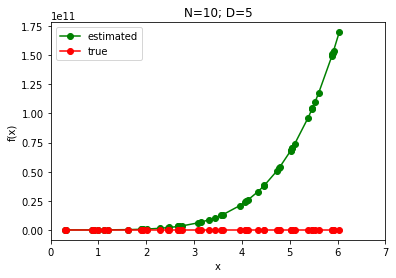

N=30; D=5
(30, 6)
MSE on train data =  [6.08975159e+18 6.46469754e+16 2.68607324e+17 1.10951518e+08
 2.26465571e+17 1.19557264e+16 3.45295219e+19 2.01183507e+18
 4.52136869e+13 1.04757312e+18 6.45933672e+18 3.34854332e+18
 1.34488566e+16 7.74958093e+17 3.09500976e+13 1.09965829e+09
 5.82518256e+17 4.34703000e+12 3.38601046e+15 2.12590632e+18
 1.03111042e+14 2.40883550e+14 9.63161399e+08 1.68776938e+19
 2.19094079e+11 1.88845879e+11 1.49157406e+19 6.52430152e+18
 1.40635533e+19 3.71345353e+19]


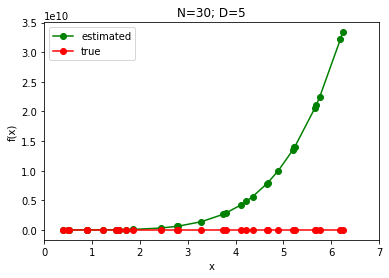

MSE on test data =N  [2.08095297e+18 1.99213840e+18 7.66204482e+13 2.20953081e+17
 9.44265188e+18 2.70650786e+16 6.04239639e+07 6.29048206e+11
 5.25070751e+13 5.55228221e+18 2.13609625e+16 6.50099497e+06
 1.83783108e+19 1.02130290e+18 5.33273916e+17 1.81313029e+19
 2.28612876e+18 1.11824391e+19 1.08539228e+19 5.62411789e+18
 2.79193794e+10 1.30148268e+12 9.10806245e+18 2.98521735e+18
 2.92624717e+18 5.90427825e+17 1.04047640e+13 2.01821470e+13
 1.93331077e+16 9.82623761e+17 1.32162793e+16 9.06697811e+18
 6.93194850e+17 5.36434006e+16 5.71319610e+18 3.21405972e+18
 2.81429957e+17 3.30254548e+07 1.41056833e+13 1.53214868e+04
 1.66715870e+15 3.14791786e+17 1.66970630e+19 1.27069571e+10
 5.98123782e+16 5.50089693e+09 1.07713012e+18 3.57392541e+10
 2.94723820e+18 1.04189456e+15]


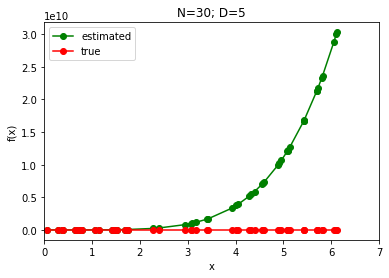

[3, 5, 10, 30] [7.138079926573607e+21, 2.7225972250650025e+18, 8.145446367973983e+20, 4.902490145482315e+18]
[3, 5, 10, 30] [3.657022071138995e+21, 1.577221043202259e+19, 4.347170212394486e+20, 4.803158470156714e+18]


Text(0, 0.5, 'MSE')

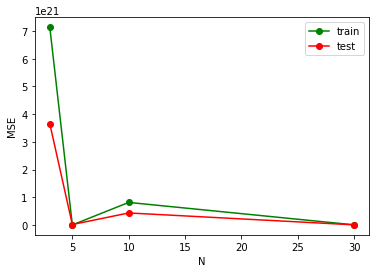

In [0]:
D = 5
MSE_train = []
MSE_test = []
N_all = [3,5,10,30]
for N in N_all:
  title = "N=%d; D=%d"%(N,D)
  print(title)
  x, y, yd, w, mse = trainModel(N,D)
  MSE_train.append(sum(mse)/N)
  print('MSE on train data = ', mse)
  plotModel(x,y,yd,title)
  Ntest = 50
  x, y, yd, mse = testModel(Ntest,w)
  MSE_test.append(sum(mse)/N)
  print('MSE on test data =N ', mse)
  plotModel(x,y,yd,title)
plt.figure()
print(N_all,MSE_train)
print(N_all,MSE_test)
plt.plot(N_all, MSE_train,'go-')
plt.plot(N_all, MSE_test, 'ro-')
plt.legend(['train','test'])
plt.xlabel('N')
plt.ylabel('MSE')

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

N=10; D=0
(10, 1)
MSE on train data =  [0.17259726 0.01081998 0.02538491 0.0681766  0.11916422 0.02671172
 0.18027836 0.03089645 0.00947607 0.02670778]


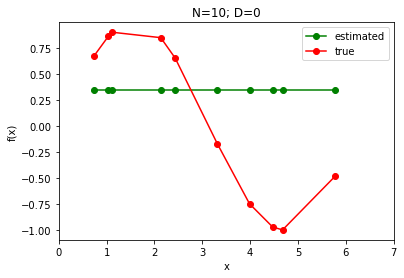

MSE on test data =  [5.66526951e-03 4.68279043e-03 1.83883426e-03 1.26130621e-04
 5.89480206e-03 6.71334574e-03 2.32334837e-02 9.45061197e-03
 7.97486901e-03 2.64657864e-02 3.91850326e-04 2.77886079e-02
 1.92201774e-04 9.83256452e-04 7.62872028e-04 4.62533956e-07
 1.85639814e-02 6.69461650e-03 4.96754188e-03 1.52602499e-02
 4.97223151e-03 8.60577252e-03 3.29663968e-02 4.84390312e-04
 2.82729820e-03 3.06072001e-02 4.30517660e-03 3.29279599e-02
 1.58121944e-02 3.25833800e-02 7.83983608e-04 1.61315679e-03
 8.50375151e-03 1.38694074e-02 2.93707900e-02 2.30104404e-04
 5.41565924e-03 3.14675163e-03 2.61997489e-03 1.64446535e-02
 2.47907298e-02 7.83636239e-03 5.42312544e-04 2.17512237e-02
 7.81724408e-03 6.79728160e-03 1.64212885e-02 3.12363259e-03
 3.69135857e-03 3.60771491e-02]


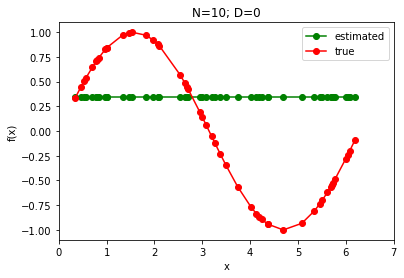

N=10; D=1
(10, 2)
MSE on train data =  [ 11.31053407 177.73105392   6.34158014 289.15395633   1.13353081
  78.12610167 356.29608245 130.12372954   2.51633016 224.04096016]


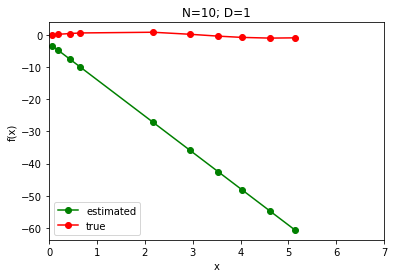

MSE on test data =  [ 71.24119966  22.5604212   34.13878373  21.12089939  81.76492706
 102.93878054   3.46771356  29.82868576  24.57593255  97.34141667
   1.90560772   6.13125182 106.0742713   55.34400187  71.50283147
  84.58360994  68.1290055   77.28129898  49.12315827  35.44674007
  62.84417855   6.84018878  19.25018712  26.19203524  19.97458058
  15.59043217  38.98798244  45.32828651  17.86785856  22.9923596
  73.23967036  69.61372305   0.87893103   3.59994682  10.99121282
   3.23125973  45.61184015  53.00269763  53.33749717  54.42492449
  35.71624056  60.51953644  60.97982545  22.06514932  48.86014281
  32.33033902  65.31056463  23.75067646   6.80682174  20.24141561]


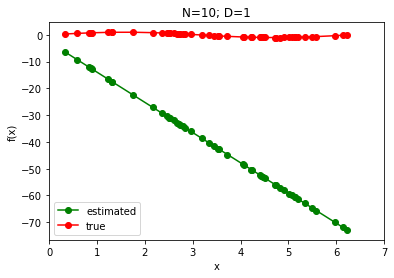

N=10; D=2
(10, 3)
MSE on train data =  [20906162.03545681  1049832.61311021  6285541.87321907  5339928.30235878
   224465.22742654   409173.41303757  1163257.70264949   977977.55693913
  1991917.59308829 11893186.37475817]


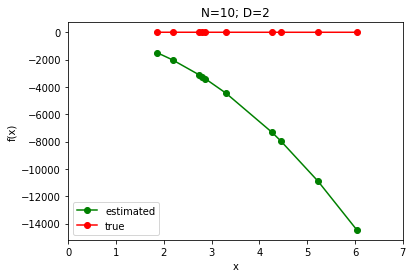

MSE on test data =  [1.04560540e+04 1.87693298e+02 2.67943442e+06 4.44179371e+04
 2.38750562e+03 9.28842683e+03 5.89559505e+04 7.50225249e+03
 9.08888912e+03 1.43156413e+05 2.13214506e+06 1.12620178e+04
 3.33873936e+06 1.71017060e+02 8.49359708e+03 2.15698702e+03
 3.27009175e+05 1.13836895e+05 4.34295415e+06 1.24085199e+05
 5.86766390e+05 2.34790120e+05 9.74934044e+02 1.34740378e+06
 2.14969563e+05 1.51213708e+06 1.22057161e+05 9.95358434e+02
 9.07574865e+04 4.55843712e+03 2.31774059e+05 4.13597514e+05
 7.56704476e+05 1.14433065e+05 4.23858046e+05 1.81542916e+06
 3.15550372e+04 3.54167086e+03 6.45253117e+05 6.61799330e+05
 1.25676320e+06 1.05591518e+05 5.00659197e+04 4.91961369e+05
 7.47947521e+05 4.42319141e+04 3.44834872e+06 3.20948786e+06
 5.98203777e+04 5.39594890e+04]


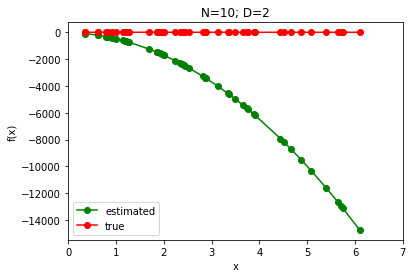

N=10; D=4
(10, 5)
MSE on train data =  [1.15146477e+05 1.19410930e+15 5.15005552e+06 5.19091345e+15
 2.45599176e+16 1.84121151e+16 9.80088477e+13 1.69364649e+16
 6.93695996e+09 2.24370620e+15]


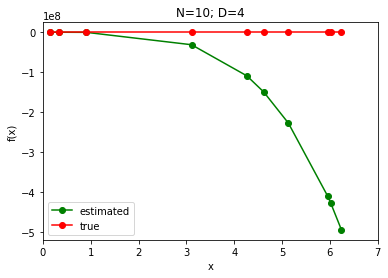

MSE on test data =  [1.41721984e+13 4.54017053e+10 1.82234543e+15 4.36369031e+13
 3.15461468e+11 2.26142426e+14 3.65746076e+13 8.10503712e+09
 2.09797229e+14 5.60869115e+08 4.38822492e+10 1.29228902e+15
 1.07708222e+12 3.40914115e+15 3.30680489e+13 7.86106248e+14
 3.88685186e+13 8.78328727e+14 4.81730591e+15 4.18882296e+15
 9.56135063e+13 2.73616701e+10 5.41009239e+05 8.60475287e+13
 8.65636926e+12 2.72417520e+06 1.25925224e+07 2.04146070e+15
 6.90223428e+12 4.76309636e+12 5.64837178e+14 9.02784706e+10
 8.65630392e+05 1.25459899e+14 5.04910044e+08 1.91883083e+15
 3.21731185e+15 1.57817252e+15 5.06638303e+13 4.71557372e+15
 1.15321634e+14 1.70178226e+05 7.54654029e+11 2.00465727e+15
 4.56765245e+13 2.13267362e+03 2.00287861e+14 6.66503378e+11
 6.71953051e+11 4.42150577e+14]


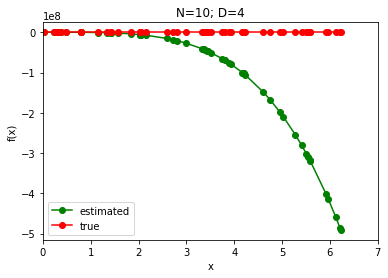

N=10; D=7
(10, 8)
MSE on train data =  [2.02814004e+26 7.05410992e+26 4.06870514e+21 5.39114267e+10
 5.07936993e+11 2.17568667e+21 4.03860949e+21 2.29201321e+25
 1.63499914e+22 2.10464591e+24]


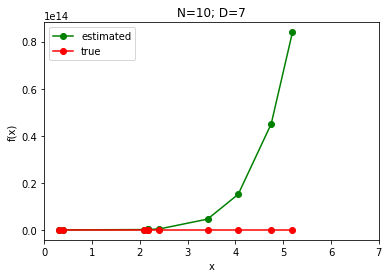

MSE on test data =  [1.36326347e+26 9.09219209e+12 3.34322167e+26 3.47931021e+23
 2.60604972e+23 2.13541831e+07 3.15801786e+26 9.95964567e+15
 3.05782092e+25 7.81102867e+24 7.09186721e+18 1.80053923e+17
 9.38081592e+22 1.38425594e+27 9.79832692e+26 4.10776497e+21
 3.98392203e+22 1.22495181e+27 1.02618566e+27 1.88292091e+21
 8.54052161e+23 1.19696856e+07 2.60025859e+25 8.01786392e+22
 1.29429078e+16 7.36441391e+22 2.20592595e+21 6.80740894e+26
 3.69028146e+26 2.96278308e+16 1.63660986e+26 1.20027720e+25
 3.74320692e+06 9.30128014e+24 2.18063927e+12 1.81172765e+20
 1.63893227e+11 1.07481307e+23 1.16184796e+07 3.19609517e+23
 1.09228869e+27 4.92306039e+24 4.29411931e+26 1.27231996e+23
 2.74501859e+23 9.24990380e+25 4.35638071e+19 2.41511646e+26
 3.82815334e+22 2.91135009e+25]


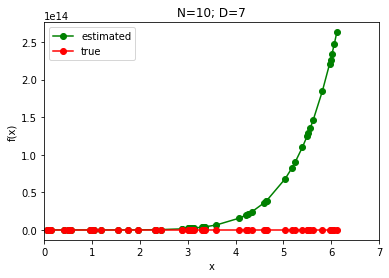

N=10; D=12
(10, 13)
MSE on train data =  [1.66585076e+54 2.61340597e+44 2.16386110e+53 4.26067300e+48
 1.09121080e+53 4.75849132e+43 5.70236299e+42 4.10683725e+41
 3.65263823e+41 6.56325687e+53]


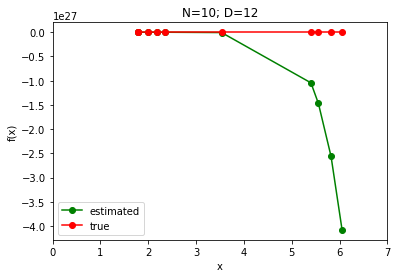

MSE on test data =  [9.06697828e+19 1.97769918e+42 1.34855384e+45 1.80951484e+48
 2.89932446e+51 9.59453966e+42 4.03321589e+42 1.10732391e+40
 4.16214878e+36 1.00260113e+22 1.48103526e+45 5.04154956e+47
 4.43288384e+51 9.53991916e+46 1.15858326e+41 6.42527720e+53
 2.59685069e+35 2.33078558e+21 1.94188342e+48 2.66850812e+40
 3.16085181e+46 5.66216378e+44 2.89481389e+52 2.25968783e+22
 6.29827022e+52 5.36764389e+48 1.11499763e+40 4.92585394e+44
 8.19706083e+44 3.77720228e+39 5.92504386e+45 3.38444460e+50
 5.33922755e+26 1.27871941e+49 9.27101524e+43 1.56723611e+50
 5.58719353e+53 2.20227649e+32 7.96576483e+53 8.75028552e+36
 1.52555177e+52 3.05766634e+26 3.64825928e+19 3.64402893e+51
 5.08818903e+29 4.24025186e+44 1.86942245e+49 5.76703067e+52
 8.47759029e+46 7.59603042e+42]


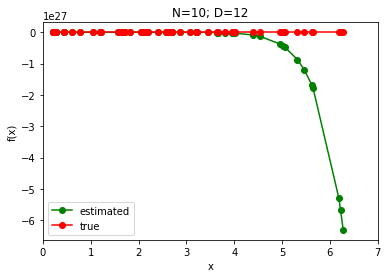

Text(0, 0.5, 'MSE')

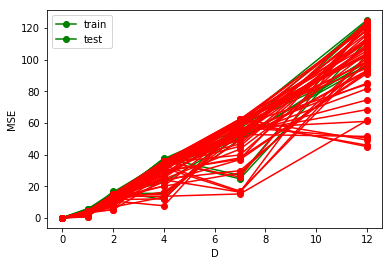

In [0]:

N=10
MSE_train = []
MSE_test = []
D_all = [0,1,2,4,7,12]
for D in D_all:
  title = "N=%d; D=%d"%(N,D)
  print(title)
  x, y, yd, w, mse = trainModel(N,D)
  MSE_train.append(mse)
  print('MSE on train data = ', mse)
  plotModel(x,y,yd,title)
  Ntest = 50
  x, y, yd, mse = testModel(Ntest,w)
  MSE_test.append(mse)
  print('MSE on test data = ', mse)
  plotModel(x,y,yd,title)
plt.figure()
MSE_train = np.array(MSE_train)
plt.plot(D_all, np.log(MSE_train+1),'go-')
MSE_test = np.array(MSE_test)
plt.plot(D_all, np.log(MSE_test+1), 'ro-')
plt.legend(['train','test'])
plt.xlabel('D')
plt.ylabel('MSE')